# 실습 3: CIFAR-10 컬러 이미지 분류

**목표**: CNN으로 컬러 이미지 분류, 75% 달성

**도전**: 정확도 75% 넘기기!

---

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

## Step 1: 데이터 준비

In [2]:
# CIFAR-10 로드
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# 정규화
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 클래스 이름
class_names = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

print(f"학습 데이터: {X_train.shape}")
print(f"테스트 데이터: {X_test.shape}")
print(f"클래스: {class_names}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
학습 데이터: (50000, 32, 32, 3)
테스트 데이터: (10000, 32, 32, 3)
클래스: ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

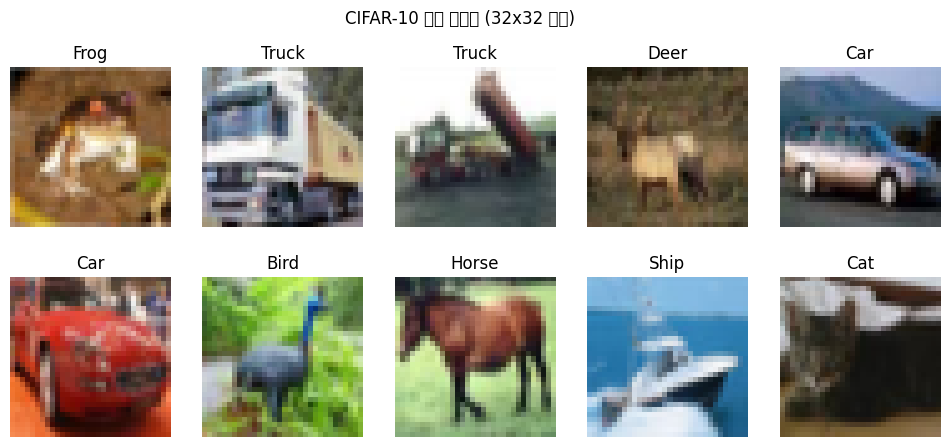

In [3]:
# 샘플 이미지
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(class_names[y_train[i][0]])
    ax.axis('off')
plt.suptitle('CIFAR-10 샘플 이미지 (32x32 컬러)')
plt.show()

## Step 2: CNN 모델

In [4]:
model = keras.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # 분류기
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    learning_rate=0.001
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

## Step 3: 학습

In [5]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3362 - loss: 1.7915 - val_accuracy: 0.5616 - val_loss: 1.2418
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5733 - loss: 1.2072 - val_accuracy: 0.6746 - val_loss: 0.9265
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6473 - loss: 1.0036 - val_accuracy: 0.7010 - val_loss: 0.8537
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6887 - loss: 0.8809 - val_accuracy: 0.7418 - val_loss: 0.7671
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7150 - loss: 0.8025 - val_accuracy: 0.7476 - val_loss: 0.7145
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7344 - loss: 0.7505 - val_accuracy: 0.7638 - val_loss: 0.6922
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7583 - loss: 0.6946 - val_accuracy: 0.7682 - val_loss: 0.6739
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7646 - loss: 0.6678 - val_accuracy: 

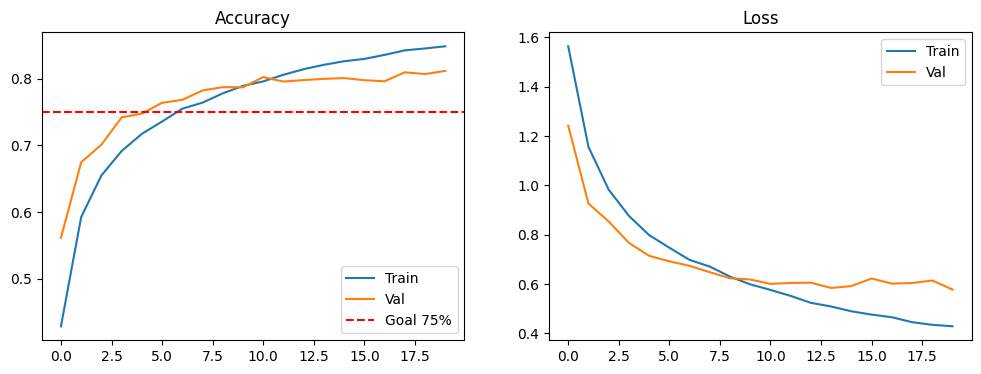

In [7]:
# 학습 그래프
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(history.history['accuracy'], label='Train')
axes[0].plot(history.history['val_accuracy'], label='Val')
axes[0].axhline(y=0.75, color='r', linestyle='--', label='Goal 75%')
axes[0].set_title('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Train')
axes[1].plot(history.history['val_loss'], label='Val')
axes[1].set_title('Loss')
axes[1].legend()
plt.show()

## Step 4: 평가

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n테스트 정확도: {test_acc:.2%}")

if test_acc >= 0.75:
    print("도전 성공! 75% 달성!")
else:
    print(f"75%까지 {0.75 - test_acc:.2%} 남았습니다.")


테스트 정확도: 79.83%
도전 성공! 75% 달성!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


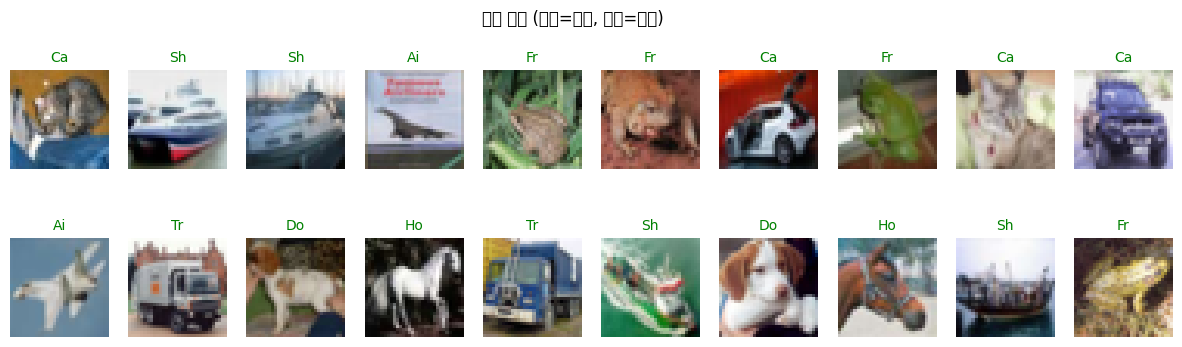

In [13]:
# 예측 결과
predictions = model.predict(X_test[0:20])

fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    pred = np.argmax(predictions[i])
    actual = y_test[i][0]
    color = 'green' if pred == actual else 'red'
    ax.set_title(f'{class_names[pred][:2]}', color=color, fontsize=10)
    ax.axis('off')
plt.suptitle('예측 결과 (초록=정답, 빨강=오답)')
plt.show()

## 도전: 정확도 높이기!

시도해볼 것들:
- Data Augmentation 추가
- 더 깊은 네트워크
- Batch Normalization
- Learning Rate 조절

In [ ]:
# 도전: Data Augmentation 추가
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# 직접 모델을 수정해보세요!
print("Data Augmentation 레이어를 모델 맨 앞에 추가해보세요!")

---
## 완료!

CIFAR-10은 MNIST보다 훨씬 어렵습니다.

- MNIST: 흑백, 단순한 숫자
- CIFAR-10: 컬러, 복잡한 사물

다음 실습에서 **전이학습**으로 더 높은 성능을 달성해봅시다!